# DataCamp Certification Case Study

### Project Brief (given)

You have been hired as a data scientist at a used car dealership in the UK. The sales team have been having problems with pricing used cars that arrive at the dealership and would like your help. Before they take any company wide action they would like you to work with the Toyota specialist to test your idea. They have already collected some data from other retailers on the price that a range of Toyota cars were listed at. It is known that cars that are more than £1500 above the estimated price will not sell. The sales team wants to know whether you can make predictions within this range.

The presentation of your findings should be targeted at the Head of Sales, who has no technical data science background.

The data you will use for this analysis can be accessed here: `"data/toyota.csv"`

Deadline: 1 day

# Introduction

### Objective

The objective of this study is to **help pricing cars** that arrive on our store.
By analyzing the given dataset, collected from other retailers, I could:

- Infer the aspects of a car that are most relevant in predicting it's selling price.
- Create a predictive pricing model that works well within a £1500 error's limit range.


### Outline

This study is structured in three main parts:

**1. Body** - representative parts of the methodology applied in both analysis and model construction.

**2. Conclusions** - sum of the achieved inferences.

**3. Appendix** - detailed computing and processes of investigation, containing EDA, feature's/target's transformations and all predictive models.


# Body

Here in the body you'll find representative steps of the process done in the analysis, for more information, please visit the Appendix section.

## First impressions

In this section, I got acquainted with the structure of the data.

In [ ]:
### Inspecting the fisrt rows of the dataset
data.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


## Exploratory Data Analysis

In this section I did some EDA while testing the association between variables and the price (target). This step is critical to wisely choose the features of the predictive model and the model itself.

### Year vs price

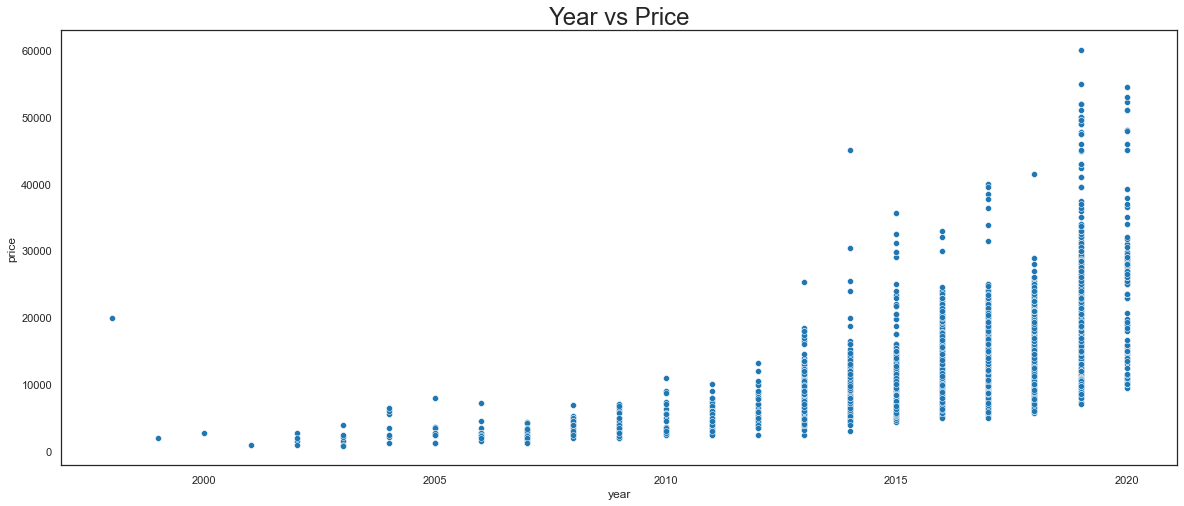

In [ ]:
### Plotting a scatter plot for year vs price
plt.figure(figsize=(20,8))
sns.scatterplot(data.year, data.price)

sns.set_context('poster')
sns.set_style('white')

plt.title('Year vs Price')
plt.show()

**Correlation between year and price: 42%** - Due to the high correlation, this variable seems to be an important feature.

In [ ]:
### Year's frequency table
year_freq = data.year.value_counts().reset_index().rename(columns = {'index':'year', 'year': 'counts'})
year_freq

,year,counts
0,2017,2019
1,2019,1286
2,2018,1015
3,2016,997
4,2015,525
5,2014,352
6,2013,204
7,2020,128
8,2012,42
9,2011,40


**Consideration**: A lot of outliers when sampling old cars, this can negatively impact the quality of the model.

### MPG vs price

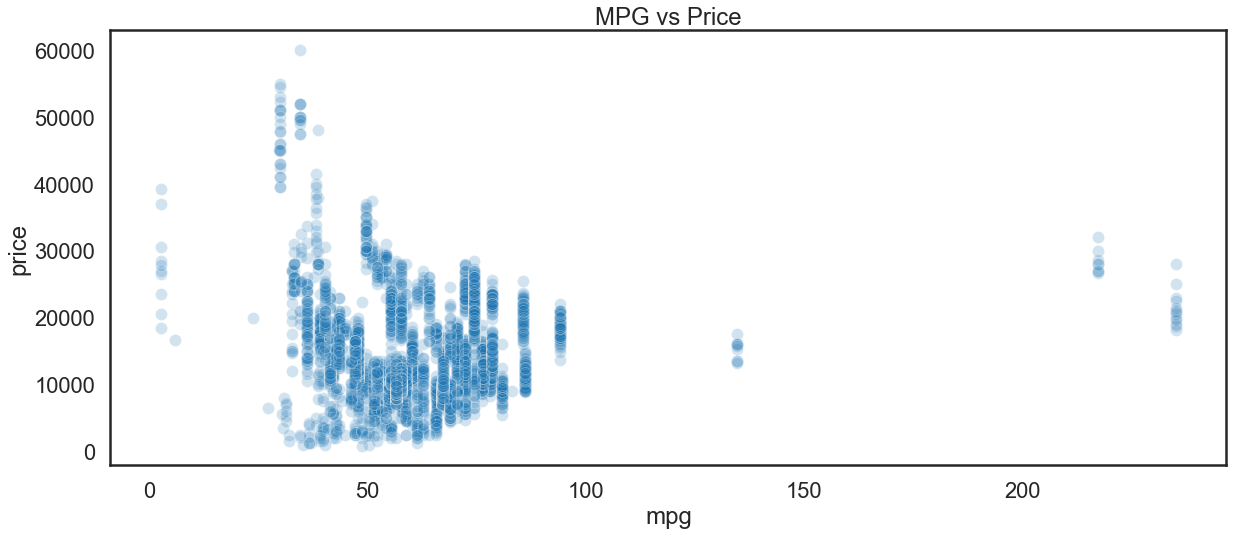

In [ ]:
### Plotting a scatter plot for MPG vs price
plt.figure(figsize=(20,8))
sns.scatterplot(data.mpg, data.price, alpha = 0.2)

sns.set_context('poster')
sns.set_style('white')

plt.title('MPG vs Price')
plt.show()

**Correlation between year and price: 4%** - Due to the low correlation, I chose not to include this variable in the model (double checked in the first model).

### Car's Model vs price

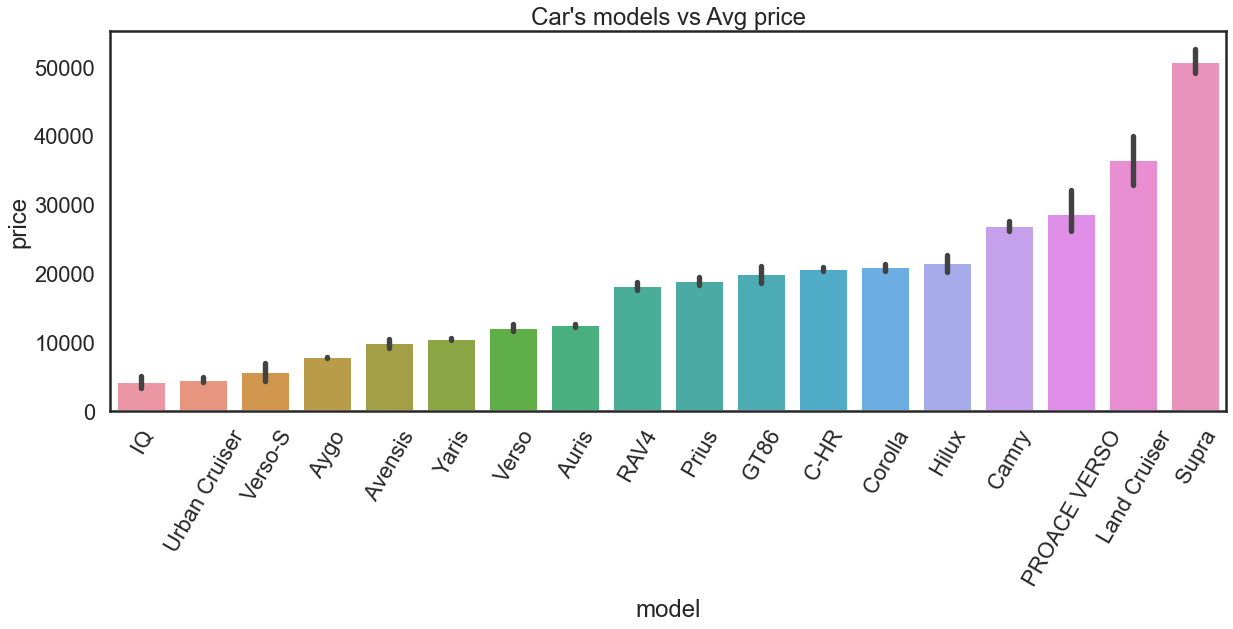

In [ ]:
### Plotting car's models vs price boxplots
plt.figure(figsize = (20,7))
sns.barplot(data = data, x = 'model', y = 'price', order = list(data.groupby('model').price.mean().sort_values().reset_index().rename(columns = {'price': 'avg_price'}).model))
plt.xticks(rotation=60)
plt.title('Car\'s models vs Avg price')
plt.show()

**Inference**: The car's model seems to greatly influence the target (price), let's include this variable as a feature (more detail in the appendix).

In [ ]:
### Computing the frequency of unique models.
counts = data.model.value_counts()
counts

 Yaris            2122
 Aygo             1961
 Auris             712
 C-HR              479
 RAV4              473
 Corolla           267
 Prius             232
 Avensis           115
 Verso             114
 Hilux              86
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: model, dtype: int64

**Consideration**: Some outliers here as well, these underpresented cars will be harder to price.

## Price predictive model

The main stages of the model's construction processes were:

1. Transforming the selected features (scaling,log..).
2. Separating a train set and a test set.
3. Training/Tuning the model with the train set.
4. Testing the set / predicting values with the test set.
5. Evaluating the results

The model that better performed was a Stochastic GradientBooster, a tree based regression model.

Below you can find some graphs and main outcomes of the models:

### Predictions vs Actual prices

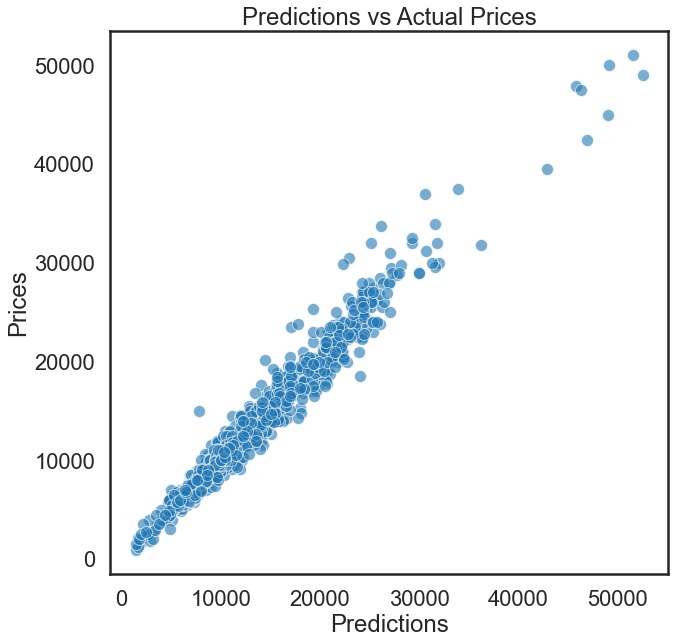

In [ ]:
### Plotting predictions vs actual prices of the test sample
plt.figure(figsize=(10,10))
sns.scatterplot(np.exp(predictions), np.exp(label_test), alpha = 0.6)
plt.title('Predictions vs Actual Prices')
plt.xlabel('Predictions')
plt.ylabel('Prices')
plt.show()

Although the model can predict very well the price of a new observation, It's still not clear if we met the necessary standards of the question ($1500 limit range for the prediction error), so let's plot the residuals, values that indicate how far each prediction was from the actual car's value.

### Residuals vs Predictions

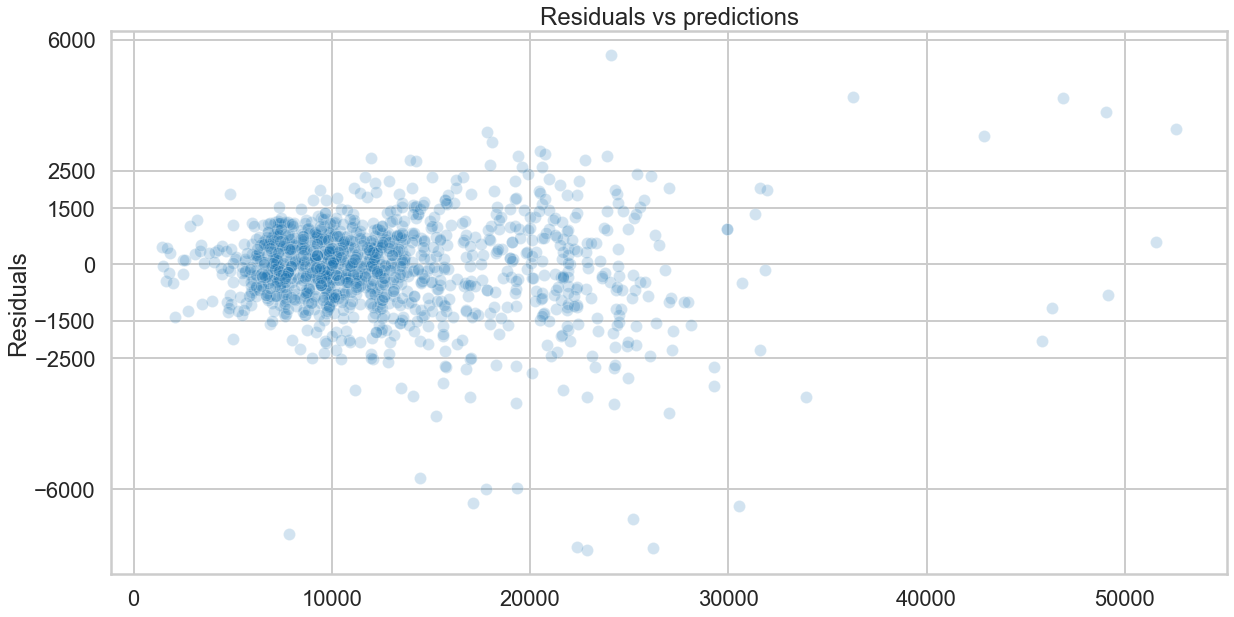

In [ ]:
### Plotting residuals vs predictions
residuals = np.exp(predictions) - np.exp(label_test)
plt.figure(figsize=(20,10))
ax = sns.scatterplot(np.exp(predictions), residuals, alpha = 0.2)
plt.ylabel('Residuals')
y_ticks = ([-2500, -1500, 0, 1500, 2500, 6000, -6000])
ax.set_yticks(y_ticks)
plt.title('Residuals vs predictions')
sns.set_style('whitegrid')
plt.show()

Interesting, there are a lot of residuals concentrated within 2500. But how many predictions stayed within the range? Let's quantify this using quantiles:

In [ ]:
print(np.quantile(residuals, 0.08))
print(np.quantile(residuals, 0.94))

##86%

-1570.6866886826938
1467.0340606306204


**Inference**: Remembering that the residuals represent the difference between the predicted value and the actual price, then 86% of the predictions stayed within a safe range, considering the 1500's limit proposed by the problem.

### Features Importance (extracted from Lasso's model)

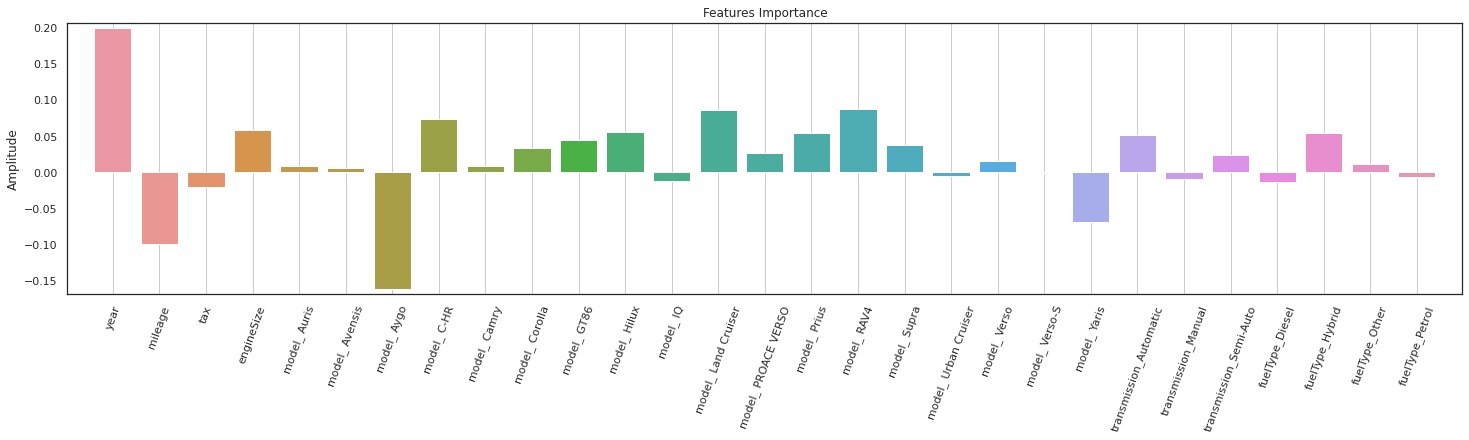

In [ ]:
###Extracting the coef importance
best_model = lasso_cv_grid.best_estimator_
sns.set_style('white')
lasso_coef = best_model.coef_
plt.figure(figsize=(25,5))
ax = sns.barplot(x =feat.columns.values, y = lasso_coef)
plt.xticks(rotation=70)
plt.title('Features Importance')
plt.ylabel('Amplitude')
ax.xaxis.grid(True)
plt.margins(0.02)
plt.show()

**Inference**: Year, Mileage, Engine size, automatic transmission, hybrid fuel type and some specific car models were the most relevant attributes with regards to influencing the price.

# Conclusions

The main Inferences from this study are:

- 5 different predictive models were used, and they reached really similar results.
- 86% of the predictions made by the best model stayed in the safe error's range of £1500.
- Probably the low volume size of the dataset (6738 observations) and outlier samples explain most of the error.
- Year, Mileage, Engine size, automatic transmission, hybrid fuel type and some specific car models were the most relevant attributes with regards to influencing the price.
- The dataset does not seem to have missing values.


Lastly, for further improvements:

- Refining the feat engineering by taking out the outliers and applying other transformations to the variables.
- Finetuning the model's hyperparameters even more.
- Making more statistical hypothesis tests both in the variables and in the target in order to verify the null hypothesis of the relations between the features.
- Trying other regression models.

# Appendix

Here you will find:
- The detailed analysis of the dataset with all feature transformations.
- The whole process through which the predictive models were built.

## Importing the modules and dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import f_oneway
from sklearn.linear_model import ElasticNet,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
sns.set_context('notebook')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### Saving the dataset as a variable (Pandas DataFrame)
path = '/content/drive/MyDrive/Colab Notebooks/Toyota/toyota.csv'
data = pd.read_csv(path)

## First impressions

In [ ]:
### Inspecting the fisrt rows of the dataset
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [ ]:
### Examining general aspects of the dataset structure 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


Some considerations:
- No null values
- Variable datatypes consistent with their properties
- Low volume sample (6738 observations)

## Exploratory Data Analysis

In this section I'm going to make some EDA while testing the association between variables and the price (target). This step is critical to wisely choose the features of the predictive model and the model itself.

First <b>quantitative</b> variables vs price..

- year vs price

- mileage vs price

- tax vs price

- mpg vs price

- engineSize vs price


..then <b>categoricals</b> vs price.


- model vs price

- transmission vs price

- FuelType vs price

### Quantitave variables vs price

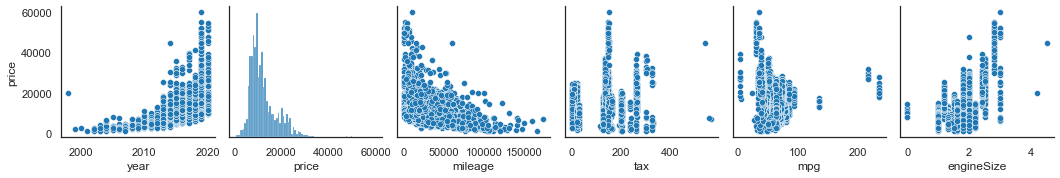

In [ ]:
### Quantitave vs price
sns.pairplot(data, y_vars = 'price')

In [ ]:
### Describe the summary statistics of quant variables
data.describe(include = ['float64', 'int64'])

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


Some inferences:

- Price values have a right skewed distribution, probably applying a log transformation before fitting the model will improve the results.
- There seems to exist a substancial linear relation between the each variable and the price, excepting tax and mpg, which are the most difficult to interpret.
- tax and mileage distribution have a high std_dev.
- The sample seems to have more recent cars.
- High engine sizes seems to be outliers.

### Year vs Price

<AxesSubplot:>

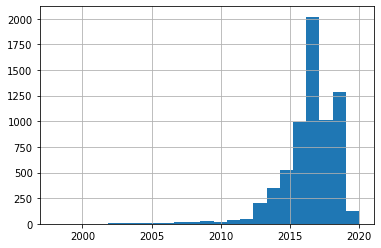

In [ ]:
### Year's histogram
data.year.hist(bins = len(data.year.unique()))

In [ ]:
np.quantile(data.year, 0.025)

2012.3250000000003

**Considerations**

- Highly left-skewed distribuction, it may be worth testing the model without the oldest cars outliers.
- As a future test, a good practice may be verifying how much is this sample different from other dataset's with t-tests.


In [ ]:
### Year's frequency table
year_freq = data.year.value_counts().reset_index().rename(columns = {'index':'year', 'year': 'counts'})
year_freq

,year,counts
0,2017,2019
1,2019,1286
2,2018,1015
3,2016,997
4,2015,525
5,2014,352
6,2013,204
7,2020,128
8,2012,42
9,2011,40


In [ ]:
### Computing Pearson correlation
corr, p_val = pearsonr(data.year, data.price)
print(corr, p_val)

0.42095940815321753 1.1539824195103575e-287


**Conclusion**

A pearson correlation of 42% is substancial, this variable seems to greatly influence the price, therefore a relevant feature to include in the model.

### Mileage vs Price

In [ ]:
corr, p_val = pearsonr(data.mileage, data.price)
print(corr, p_val)

-0.2979358207386596 3.5228440783256594e-138


This time a negative pearson correlation, still high in amplitude, so it makes sense including it as a feature. Lets take a look at the variable distribuction:

<AxesSubplot:xlabel='mileage', ylabel='Density'>

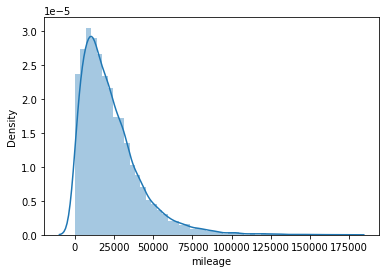

In [ ]:
sns.distplot(data.mileage)

Intutive that there would exist more cars with less mileage.

### Tax vs Price

In [ ]:
corr, p_val = pearsonr(data.tax, data.price)
print(corr, p_val)

0.21449827412878705 5.745373704521723e-71


A moderate correlation, let's include this feature and see if it improves the model. Inspecting the distribution:

<AxesSubplot:xlabel='tax', ylabel='Density'>

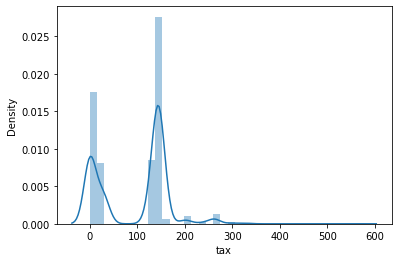

In [ ]:
sns.distplot(data.tax)

A bimodal distribuction, this may happen due to the effect of other variable, like fuel type.

### MPG vs Price

In [ ]:
corr, p_val = pearsonr(data.mpg, data.price)
print(corr, p_val)

-0.039910436429158834 0.0010500608355021532


A low correlation index, it generaly points that this variable wouldn't work well as a feature. Let's inspect it's distribuction:

<AxesSubplot:xlabel='mpg', ylabel='Density'>

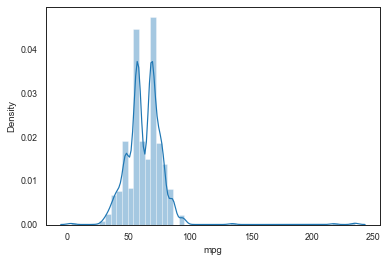

In [ ]:
sns.distplot(data.mpg)

Again, a bimodal distribution, I would bet that the motor's efficiency is highly correlated with another variable.

**Conclusion**

Let's not include mpg as a feature, the model actually performed better without it.

### Engine Size vs Price

In [ ]:
corr, p_val = pearsonr(data.engineSize, data.price)
print(corr, p_val)

0.7275924710333443 0.0


An extremely high correlation, let's include it as a feature. Inspecting it's distribution:

<AxesSubplot:xlabel='engineSize', ylabel='Density'>

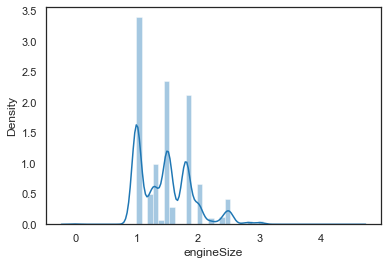

In [ ]:
sns.distplot(data.engineSize)

Considering the high density of the distribution around some observations, this variable could be considered an ordinal categorical one.

### Categorical variables vs Price

In [ ]:
### Describing summary statistics for the cat variables
data.describe(include = ['object'])

,model,transmission,fuelType
count,6738,6738,6738
unique,18,4,4
top,Yaris,Manual,Petrol
freq,2122,3826,4087


### Model vs Price

In [ ]:
### Calculating avg prices for each car's model and their respective standard deviations
model_price_mean = data.groupby('model').price.mean().sort_values().reset_index().rename(columns = {'price': 'avg_price'})
model_price_std = data.groupby('model').price.std().reset_index().rename(columns = {'price': 'std_dev'})
model_price = model_price_mean.merge(model_price_std, on = 'model')
model_price

,model,avg_price,std_dev
0,IQ,4247.250000,1286.020523
1,Urban Cruiser,4617.500000,476.121483
2,Verso-S,5746.666667,1273.188255
3,Aygo,7905.414584,1662.794122
4,Avensis,9884.356522,3376.061580
5,Yaris,10553.083883,2570.688483
6,Verso,12169.157895,3025.652682
7,Auris,12507.911517,3094.159921
8,RAV4,18161.059197,6577.193203
9,Prius,18998.844828,4696.991806


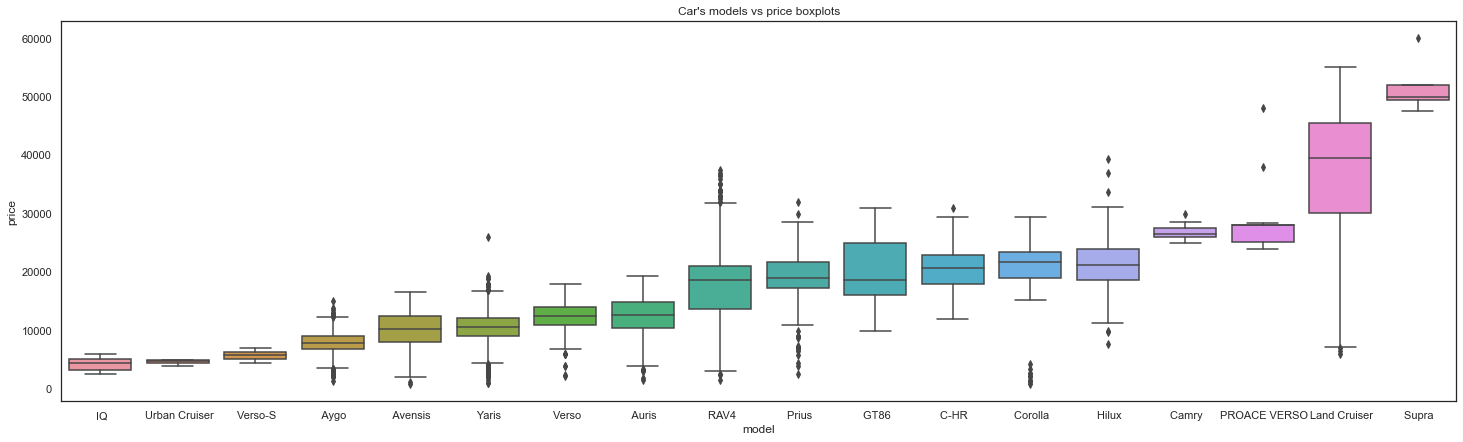

In [ ]:
### Plotting car's models vs price boxplots
plt.figure(figsize = (25,7))
sns.boxplot(data = data, x = 'model', y = 'price', order = list(model_price.model))
plt.title('Car\'s models vs price boxplots')
plt.show()

In [ ]:
### Computing the frequency of unique models.
counts = data.model.value_counts()
counts

 Yaris            2122
 Aygo             1961
 Auris             712
 C-HR              479
 RAV4              473
 Corolla           267
 Prius             232
 Avensis           115
 Verso             114
 Hilux              86
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: model, dtype: int64

As there is an evident relation of the models and the price, it is reasonable to include it as a feature.

In [ ]:
### Testing withouth the car model's outliers, masking counts < 20
#mask = data['model'].isin(counts[counts < 20].index)
#data = data[~mask]
#data.model.value_counts()

###Decided not to exclude them as the score of the MLR actually came down a little without them.

### Transmission vs Price

In [ ]:
### Calculating avg prices for each transmission type and their respective standard deviations
trans_price_mean = data.groupby('transmission').price.mean().sort_values().reset_index().rename(columns = {'price': 'avg_price'})
trans_price_std = data.groupby('transmission').price.std().reset_index().rename(columns = {'price': 'std_dev'})
trans_price = trans_price_mean.merge(trans_price_std, on = 'transmission')
trans_price

,transmission,avg_price,std_dev
0,Manual,9551.496864,3623.471963
1,Other,12795.000000,NaN
2,Semi-Auto,14797.137795,11872.081853
3,Automatic,16582.828754,6331.004023


In [ ]:
### Counting unique observations on transmission types
data.transmission.value_counts()

Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64

**Considerations**

1. It may be reasonable to take out the outlier ('Other') when building the predictive model.
2. The averages seems to be representatively distinct for each transmission type, let's analyze their distributions with violin plots.

<Figure size 432x288 with 0 Axes>

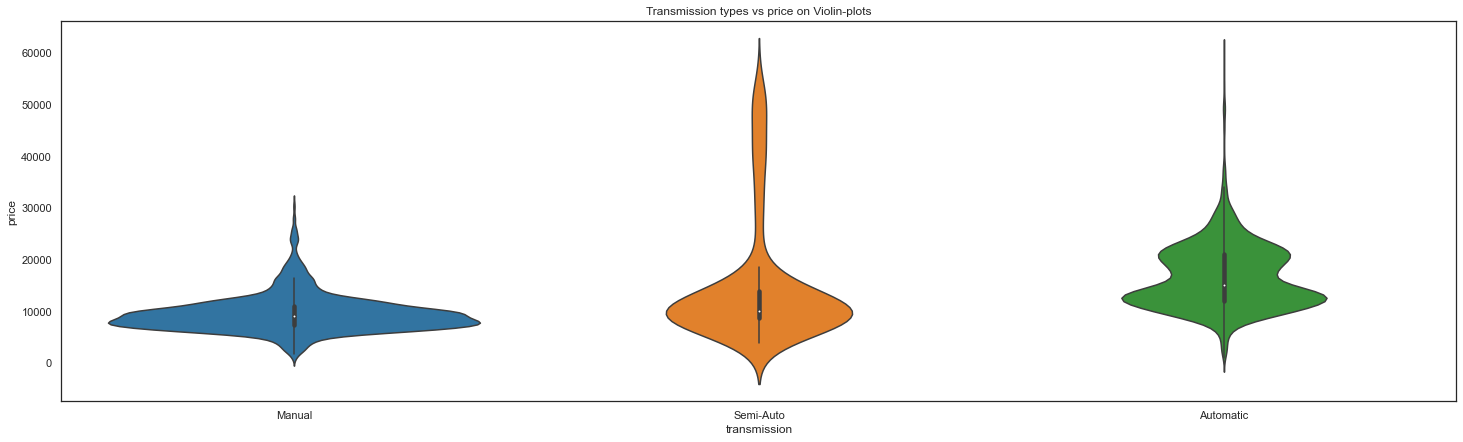

In [ ]:
### Plotting transmission types vs price on violinplots
plt.clf()
plt.figure(figsize = (25,7))
sns.violinplot(data = data[data.transmission != 'Other'], x = 'transmission', y = 'price', order = ['Manual','Semi-Auto','Automatic'])
plt.title('Transmission types vs price on Violin-plots')
plt.show()

**Inference**

Some disparities (averages and distribuctions) between the price on different transmission types may indicate that this variable explains a relevant part of the variance of the target. Let's apply a statistical test (ANOVA) to find if these disparities are actually representative or are due to mere randomness.

In [ ]:
### Anova test
fstat, pval = f_oneway(data.price[data.transmission == 'Manual'], data.price[data.transmission == 'Semi-Auto'], data.price[data.transmission == 'Automatic'])
print('Anova', 'fstat = {}'.format(fstat), 'pval = {}'.format(pval), sep = '\n')

Anova
fstat = 1381.025340366059
pval = 0.0


**Conclusions**

- A p-value of 0.0 for the Anova means that the null hypothesis is false, then a random process couldn't explain the variance contained in the different categories. 
- This variable will be included as a feature (without the outlier).

### FuelType vs Price

In [ ]:
### Calculating avg prices for each transmission type and their respective standard deviations
fuel_price_mean = data.groupby('fuelType').price.mean().sort_values().reset_index().rename(columns = {'price': 'avg_price'})
fuel_price_std = data.groupby('fuelType').price.std().reset_index().rename(columns = {'price': 'std_dev'})
fuel_price = fuel_price_mean.merge(fuel_price_std, on = 'fuelType')
fuel_price

,fuelType,avg_price,std_dev
0,Petrol,9759.537803,4134.284342
1,Other,14121.161905,8010.610464
2,Diesel,15697.807157,10208.563889
3,Hybrid,17185.472834,5485.107086


In [ ]:
data.fuelType.value_counts()

Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64

<Figure size 432x288 with 0 Axes>

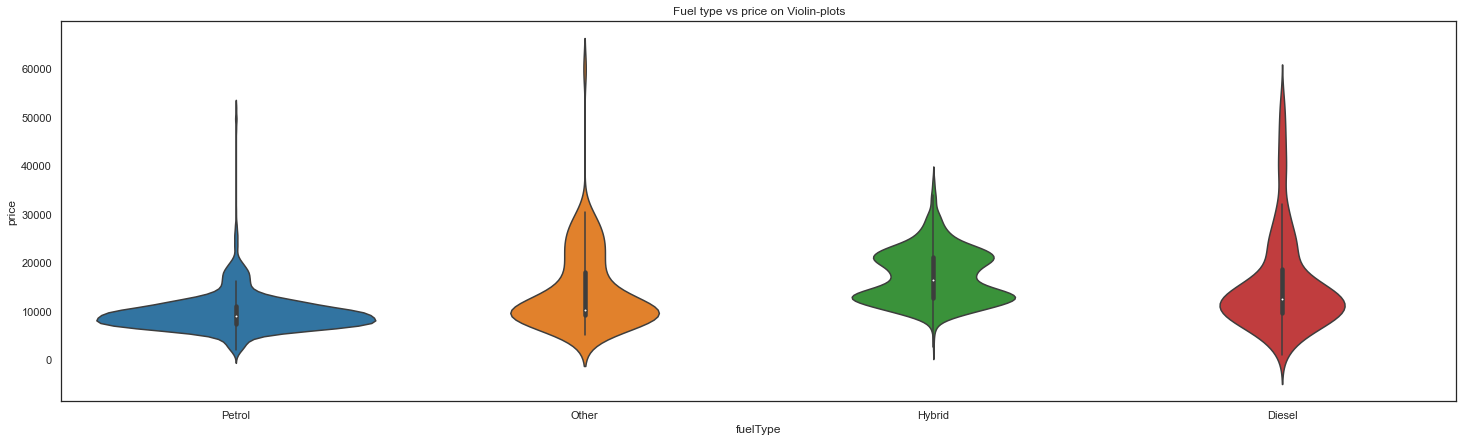

In [ ]:
### Plotting transmission types vs price on violinplots
plt.clf()
plt.figure(figsize = (25,7))
sns.violinplot(data = data, x = 'fuelType', y = 'price')
plt.title('Fuel type vs price on Violin-plots')
plt.show()

**Inference**

Because of the aparent price average and distribution disparities, Fueltype and price seem to be related, let's apply ANOVA to verify the null assumption:

In [ ]:
### Anova test
fstat, pval = f_oneway(data.price[data.fuelType == 'Petrol'], data.price[data.fuelType == 'Hybrid'], data.price[data.fuelType == 'Diesel'], data.price[data.fuelType == 'Other'])
print('Anova', 'fstat = {}'.format(fstat), 'pval = {}'.format(pval), sep = '\n')

Anova
fstat = 955.1491196427569
pval = 0.0


**Conclusion**

high fstat, pval of 0, it makes sense including the FuelType as a feature of the model.

## Price predictive models

### Feature selection/transformations

Before fitting the models, I'm going to one hot encode the categorical variables so that the models can understand them as binary:

In [ ]:
### One hot encoding categorical variables
dataset = pd.get_dummies(data[data.transmission != 'Other']) ###took out this outlier

dataset.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,model_ GT86,model_ Hilux,model_ IQ,model_ Land Cruiser,model_ PROACE VERSO,model_ Prius,model_ RAV4,model_ Supra,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2016,16000,24089,265,36.2,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,2017,15995,18615,145,36.2,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,2015,13998,27469,265,36.2,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,2017,18998,14736,150,36.2,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,2017,17498,36284,145,36.2,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
### Getting the column's names.
dataset.columns

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ Auris',
       'model_ Avensis', 'model_ Aygo', 'model_ C-HR', 'model_ Camry',
       'model_ Corolla', 'model_ GT86', 'model_ Hilux', 'model_ IQ',
       'model_ Land Cruiser', 'model_ PROACE VERSO', 'model_ Prius',
       'model_ RAV4', 'model_ Supra', 'model_ Urban Cruiser', 'model_ Verso',
       'model_ Verso-S', 'model_ Yaris', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Diesel',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol'],
      dtype='object')

In [ ]:

# Selecting the features

feat = dataset[['year', 'mileage', 'tax', 'engineSize', 'model_ Auris',
       'model_ Avensis', 'model_ Aygo', 'model_ C-HR', 'model_ Camry',
       'model_ Corolla', 'model_ GT86', 'model_ Hilux', 'model_ IQ',
       'model_ Land Cruiser', 'model_ PROACE VERSO', 'model_ Prius',
       'model_ RAV4', 'model_ Supra', 'model_ Urban Cruiser', 'model_ Verso',
       'model_ Verso-S', 'model_ Yaris', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Diesel',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol']]


# Standardizing the features
scaler = StandardScaler()
feat_scaled = scaler.fit_transform(feat)

# Selecting the label
label = dataset['price']
print('Old price distribution skewness:',label.skew())

# Applying log transformation in the target (price) to reduce it's skewness
label = np.log(dataset['price'])
print('New price distribution skewness:', label.skew())

### Spliting the training and testing samples
feat_train, feat_test, label_train, label_test = train_test_split(feat_scaled, label, train_size = 0.8, random_state = 42)

Old price distribution skewness: 1.8166278661569442
New price distribution skewness: -0.09053030736217169


### Multiple Linear Regression

In [ ]:
### Creating and fitting the model
model = LinearRegression()

model.fit(feat_train, label_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
### Predicting values from the test sample.
predictions = model.predict(feat_test)
predictions = list(predictions)

### Inspecting negative indices.
indices_negative = [i for i in range(len(predictions)) if predictions[i] < 0]
print(indices_negative)

[]


In [ ]:
### Testing the accuracy of the model
print('Model\'s accuracy', model.score(feat_test, label_test))

Model's accuracy 0.9555723698565888


High score, the chosen features explain 95% of the target variance (price).

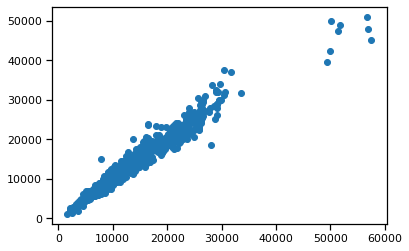

In [ ]:
### Plotting predictions vs actual prices of the test sample
plt.scatter(np.exp(predictions), np.exp(label_test))
plt.show()

Although the model can predict very well the price of a new car observation, It's still not clear if we met the necessary standards of the question ($1500 limit range for the prediction error), so let's plot the residuals, values that indicate how far each prediction was from the actual value.

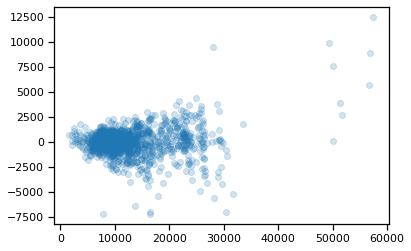

In [ ]:
### Plotting residuals vs predictions
residuals = np.exp(predictions) - np.exp(label_test)
plt.scatter(np.exp(predictions), residuals, alpha = 0.2)

Interesting, there are a lot of residuals concentrated within 2500. Maybe a histogram can be more precise to vizualize the frequency of each amplitude residual:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


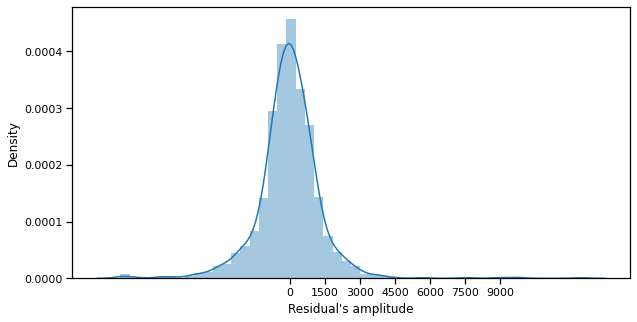

In [ ]:
### Plotting an histogram to vizualize the frequency of each residual's amplitude.
plt.figure(figsize = (10,5))
ax = plt.subplot()
sns.distplot(residuals.rename('Residual\'s amplitude'))

ax.set_xticks(range(0,10000,1500))
plt.show()

How many predictions stayed within the range? Let's quantify this using quantiles:

In [ ]:
print(np.quantile(residuals, 0.09))
print(np.quantile(residuals, 0.93))

##84%

-1493.5274153744194
1554.8182803199788


84% of the predictions stayed within a safe range, considering the 1500's limit proposed by the problem.

Finally, I always like to inspect how the model used the features to make it's predictions. This is possible by retrieving the model's coefficients:

<BarContainer object of 29 artists>

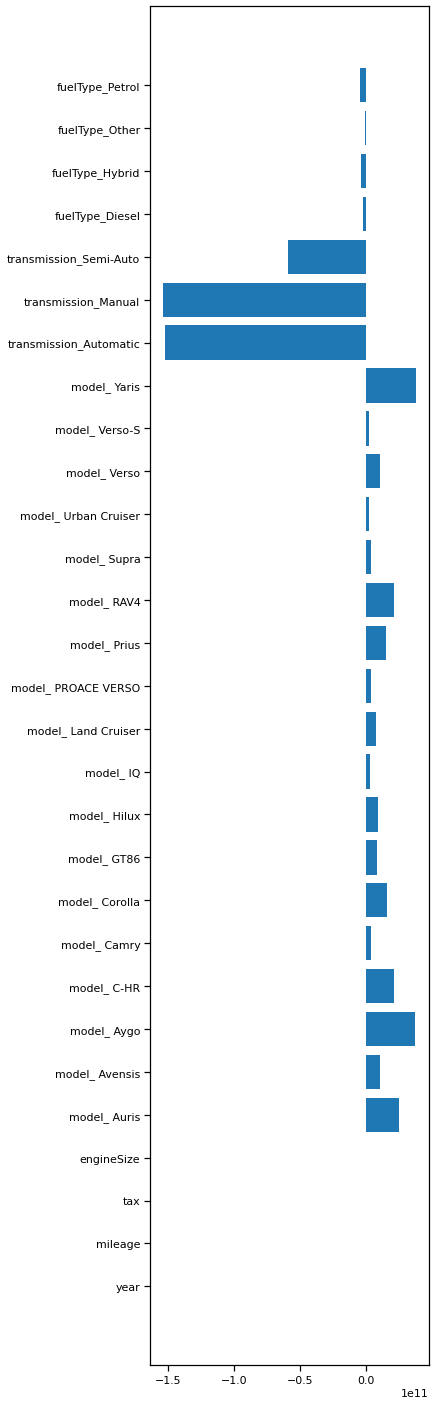

In [ ]:
coef = model.coef_
plt.figure(figsize = (5,25))
plt.barh(width = coef, y = feat.columns )

### Ridge/Lasso/ElasticNet Regression

**Ridge**

In [ ]:
param_grid = {'alpha': np.linspace(1,100, num = 100)}
ridge = Ridge()
ridge_cv_grid = GridSearchCV(ridge, param_grid, cv = 10)
ridge_cv_grid.fit(feat_train, label_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
   

In [ ]:
ridge_cv_grid.best_params_

{'alpha': 18.0}

In [ ]:
ridge_cv_grid.best_score_

0.9505875876954833

In [ ]:
ridge_cv_grid.score(feat_test, label_test)

0.9554112729887412

**Lasso**

In [ ]:
### building and fitting the grid object
param_grid = {'alpha': np.linspace(0,1, num = 100)}
lasso = Lasso()
lasso_cv_grid = GridSearchCV(lasso, param_grid, cv = 10)
lasso_cv_grid.fit(feat_train, label_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.03477143416205, tolerance: 0.10732073538365906
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dis

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.070...
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
lasso_cv_grid.best_params_

{'alpha': 0.0}

In [ ]:
lasso_cv_grid.best_score_

0.9505646210345017

In [ ]:
lasso_cv_grid.score(feat_test, label_test)

0.9555685929073661

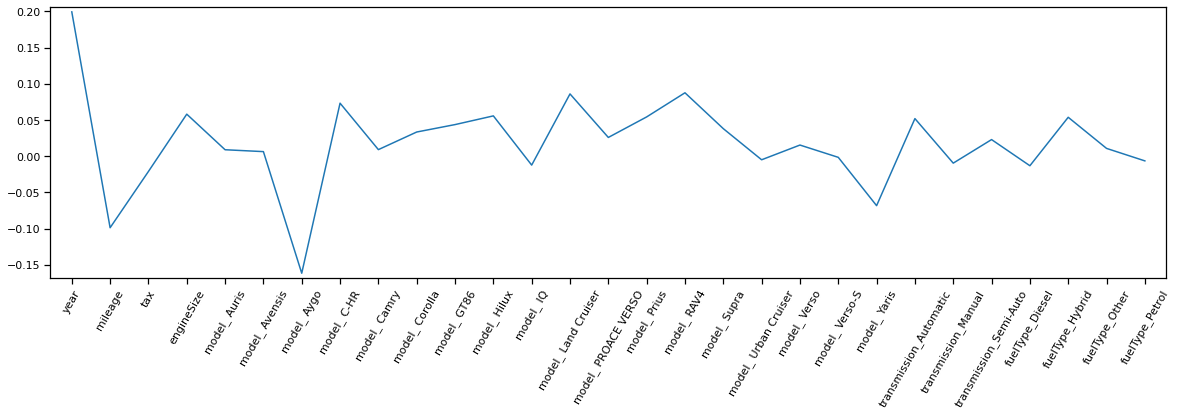

In [ ]:
###Extracting the coef importance
best_model = lasso_cv_grid.best_estimator_
lasso_coef = best_model.coef_
plt.figure(figsize=(20,5))
plt.plot(range(len(feat.columns)), lasso_coef)
plt.xticks(range(len(feat.columns)), feat.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

**ElasticNet**

In [ ]:
param_grid = {'l1_ratio': np.linspace(0,1, num = 30), 'alpha': np.linspace(0.0001,0.001, num = 30)}
elastic = ElasticNet()
elastic_cv_grid = GridSearchCV(elastic, param_grid, cv = 5)
elastic_cv_grid.fit(feat_train, label_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.98370220304887, tolerance: 0.09506859119620892
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.898533952331732, tolerance: 0.09260442562419026
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.41710588527056, tolerance: 0.09426819806814876
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.97

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.0001    , 0.00013103, 0.00016207, 0.0001931 , 0.00022414,
       0.00025...
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=No

In [ ]:
elastic_cv_grid.best_params_

{'alpha': 0.001, 'l1_ratio': 0.06896551724137931}

In [ ]:
elastic_cv_grid.best_score_

0.9504582309693832

In [ ]:
elastic_cv_grid.score(feat_test, label_test)

0.9555095589392687

In [ ]:
### Predicting values from the test sample.
predictions = elastic_cv_grid.predict(feat_test)
predictions = list(predictions)

### Inspecting negative indices.
indices_negative = [i for i in range(len(predictions)) if predictions[i] < 0]
print(indices_negative)

[]


In [ ]:
### Testing the accuracy of the model
print('Model\'s accuracy', elastic_cv_grid.score(feat_test, label_test))

Model's accuracy 0.9555095589392687


High score, the chosen features explain 95% of the target variance (price).

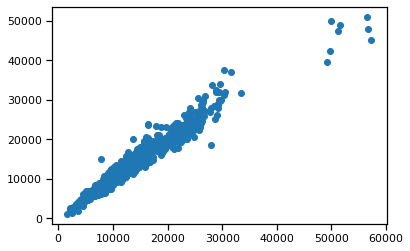

In [ ]:
### Plotting predictions vs actual prices of the test sample
plt.scatter(np.exp(predictions), np.exp(label_test))
plt.show()

Although the model can predict very well the price of a new car observation, It's still not clear if we met the necessary standards of the question ($1500 limit range for the prediction error), so let's plot the residuals, values that indicate how far each prediction was from the actual value.

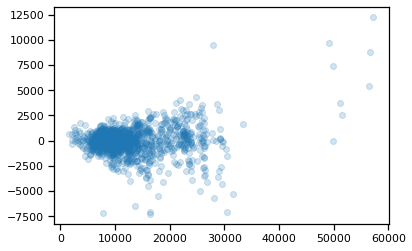

In [ ]:
### Plotting residuals vs predictions
residuals = np.exp(predictions) - np.exp(label_test)
plt.scatter(np.exp(predictions), residuals, alpha = 0.2)

Interesting, there are a lot of residuals concentrated within 2500. Maybe a histogram can be more precise to vizualize the frequency of each amplitude residual:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


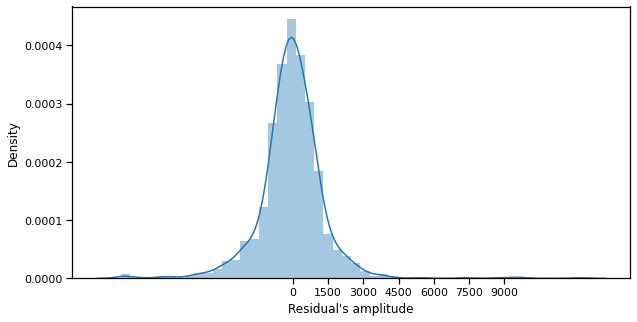

In [ ]:
### Plotting an histogram to vizualize the frequency of each residual's amplitude.
plt.figure(figsize = (10,5))
ax = plt.subplot()
sns.distplot(residuals.rename('Residual\'s amplitude'))

ax.set_xticks(range(0,10000,1500))
plt.show()

How many predictions stayed within the range? Let's quantify this using quantiles:

In [ ]:
print(np.quantile(residuals, 0.09))
print(np.quantile(residuals, 0.93))

##84%

-1495.5109571821022
1549.7892023253546


84% of the predictions stayed within a safe range, considering the 1500's limit proposed by the problem.

### Stochastic GradientBoostingRegressor

In [ ]:
###Building the SGBR object with 200 estimators
sgbr = GradientBoostingRegressor(random_state = 2, n_estimators = 200)

In [ ]:
###building the grid object to finetune the hyperparams
param_dict = {'max_depth': np.arange(3,7), 'subsample': np.linspace(0.5,5, num =5), 'max_features': np.linspace(0,1, num=5), 'learning_rate': np.linspace(0.01,1, num = 10)}
grid_tree = GridSearchCV(estimator = sgbr, param_grid = param_dict, cv = 5, scoring = 'r2')

In [ ]:
grid_tree.fit(feat_train, label_train)

In [ ]:
grid_tree.best_params_

In [ ]:
grid_tree.best_score_

In [ ]:
grid_tree.score(feat_test, label_test)

In [ ]:
### Predicting values from the test sample.
predictions = grid_tree.predict(feat_test)
predictions = list(predictions)

### Inspecting negative indices.
indices_negative = [i for i in range(len(predictions)) if predictions[i] < 0]
print(indices_negative)

In [ ]:
### Testing the accuracy of the model
print('Model\'s accuracy', grid_tree.score(feat_test, label_test))

High score, the chosen features explain 96%.1 of the target variance (price). **Best Model**

In [ ]:
### Plotting predictions vs actual prices of the test sample
plt.scatter(np.exp(predictions), np.exp(label_test))
plt.show()

Although the model can predict very well the price of a new car observation, It's still not clear if we met the necessary standards of the question ($1500 limit range for the prediction error), so let's plot the residuals, values that indicate how far each prediction was from the actual value.

In [ ]:
### Plotting residuals vs predictions
residuals = np.exp(predictions) - np.exp(label_test)
plt.scatter(np.exp(predictions), residuals, alpha = 0.2)

Interesting, there are a lot of residuals concentrated within 2500. Maybe a histogram can be more precise to vizualize the frequency of each amplitude residual:

In [ ]:
### Plotting an histogram to vizualize the frequency of each residual's amplitude.
plt.figure(figsize = (10,5))
ax = plt.subplot()
sns.distplot(residuals.rename('Residual\'s amplitude'))

ax.set_xticks(range(0,10000,1500))
plt.show()

How many predictions stayed within the range? Let's quantify this using quantiles:

In [ ]:
print(np.quantile(residuals, 0.08))
print(np.quantile(residuals, 0.945))

##87%

86.5% of the predictions stayed within a safe range, considering the 1500's limit proposed by the problem.